In [20]:
import numpy as np
import librosa
import librosa.display
import os
from matplotlib import pyplot as plt
import random

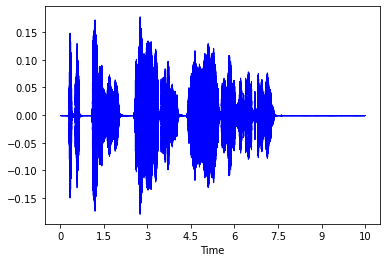

In [2]:
# attempt to load a wave file
wav_data_path = os.path.join("Dataset","fujitou_normal","fujitou_normal_001.wav") 

x, fs = librosa.load(wav_data_path, sr=44100)

librosa.display.waveshow(x, sr=fs, color='blue')

In [3]:
x.shape

(462168,)

<ipython-input-4-e00070e708b3>:2: FutureWarning: Pass y=[ 2.9128509e-05 -9.4395460e-07  3.6090707e-05 ... -6.3290267e-05
  1.2563883e-05 -3.4199227e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


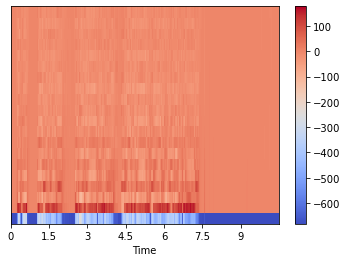

In [4]:
# transfer from wav to mfcc
mfccs = librosa.feature.mfcc(x, sr=fs)
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [5]:
# noticed there are regions before and after the recording without any voice, attempt to remove them
def cut_silence(wavdata, eps=0.01):
    abs_data = np.abs(wavdata)
    threshold = np.max(abs_data) * eps
    #cut data < 0.01 * max y value from the beginning
    start = 0
    while start < len(wavdata) and abs_data[start] < threshold:
        start += 1
    #cut data < 0.01 * max y value from the end
    end = len(wavdata)-1
    while end > 0 and abs_data[end] < threshold:
        end -= 1
    return wavdata[start:end+1]

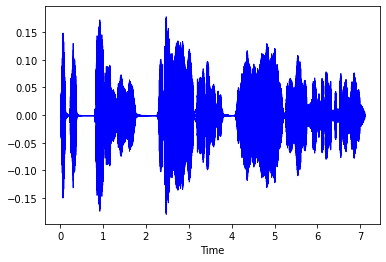

In [6]:
# after cutting, show the wav data
x = cut_silence(x)
librosa.display.waveshow(x, sr=fs, color='blue')

In [7]:
x.shape

(313076,)

<ipython-input-9-7fdcbabb9d7f>:2: FutureWarning: Pass y=[ 0.00181506  0.00190042  0.00191989 ... -0.00177617 -0.0016502
 -0.00180526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


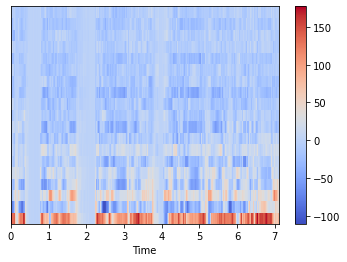

In [9]:
# trasfer to mfcc again
mfccs = librosa.feature.mfcc(x, sr=fs)
# Row 0 of mfcc only conveys a constant offset, which can be discarded when performing classification
mfccs = mfccs[1:]
librosa.display.specshow(mfccs, sr=fs, x_axis='time')
plt.colorbar()

In [10]:
mfccs

array([[115.239395 , 163.57368  , 177.12724  , ...,  56.15554  ,
         63.54048  ,  83.17726  ],
       [ 55.902008 ,  24.222504 , -20.815758 , ...,  44.968475 ,
         44.119144 ,  39.701004 ],
       [ 35.899372 ,   3.9253197,  -3.994861 , ...,  86.03823  ,
         72.359406 ,  49.972763 ],
       ...,
       [ -7.6034675, -13.884184 , -19.964054 , ..., -11.882668 ,
        -11.212208 , -13.860872 ],
       [-17.871193 , -21.632685 , -27.484322 , ...,  -7.4614677,
         -2.5080838,  -5.3353515],
       [ -7.575162 ,  -3.253449 ,  -5.9305897, ...,   1.4064724,
         -1.5133917,  -3.259406 ]], dtype=float32)

Following blocks are adapted from a website: https://qiita.com/atily17/items/ca9c594ec678f241e8bf

In [11]:
# Transfer from wav to mfcc files and save as npy files all together
DATASET_DIR="Dataset"

wavdatas = []

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    d = os.path.join(DATASET_DIR, d)
    datalist = os.listdir(d)
    y = [d[d.find("\\")+1:d.find("_")], d[d.find("_") + 1:]] # from file name to determine the correct label
    datalist = [[os.path.join(d,x), y] for x in datalist]
    wavdatas.extend(datalist)

In [12]:
MFCCs_DATA = "MFCCsData"

dirlist = os.listdir(DATASET_DIR)
for d in dirlist:
    os.makedirs(os.path.join(MFCCs_DATA, d), exist_ok=True)

In [13]:
def get_mfcc(datadir):
    x, fs = librosa.load(datadir, sr=44100)
    x = cut_silence(x)
    mfccs = librosa.feature.mfcc(x, sr=fs)
    mfccs = mfccs[1:]
    return mfccs, x, fs

In [14]:
nn = len(wavdatas)
for i, data in enumerate(wavdatas):
    path_list = data[0].split("\\")
    path_list[0] = MFCCs_DATA
    path_list[2] = path_list[2].replace(".wav", ".npy")
    mfccs_path = "\\".join(path_list)
    mfcc,x,fs = get_mfcc(data[0])
    if i%10 == 0:
        print(i, "/", nn)
    np.save(mfccs_path, mfcc)

<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00289613  0.00296514  0.00293736 ... -0.00292669 -0.00290606
 -0.00288079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)


0 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00565758 -0.00593372 -0.00637239 ...  0.00489086  0.00538668
  0.00568774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00741819 -0.00822059 -0.00831638 ... -0.0055339  -0.00560684
 -0.00547918] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00399235 -0.00036325  0.00306311 ... -0.00412606 -0.0040392
 -0.00394146] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00477157 -0.00239171  0.00220109 ... -0.00472687 -0.00471449
 -0.00471596] as keyword args. From version 0.10 passing 

10 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00591079 0.0054228  0.00493581 ... 0.00444124 0.00568788 0.00603218] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00382075  0.00137894 -0.00238483 ...  0.0040343   0.00383504
  0.00370358] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00362196 -0.00326554 -0.00229128 ... -0.00344328 -0.00342527
 -0.0030816 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00551782 0.00526066 0.00495047 ... 0.00498358 0.00519985 0.00530984] as keyword args. From version 0.10 passing these as posi

20 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00517164 -0.00406226 -0.00222682 ...  0.00608772  0.00560242
  0.00502719] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00351905 -0.0036512  -0.00379493 ...  0.00411987  0.00406966
  0.00393773] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00443382 0.00347506 0.00420798 ... 0.0041789  0.0043415  0.00415057] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00443069 -0.00175665  0.00158507 ... -0.00433526 -0.00435685
 -0.00407459] as keyword args. From version 0.10 passing these 

30 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00497218 -0.00354453  0.00076744 ...  0.00376393  0.00428701
  0.00422174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00314348 -0.00352192 -0.00273279 ... -0.00312978 -0.00300192
 -0.00289947] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0031194   0.00254938 -0.00110596 ...  0.00326605  0.0031791
  0.00296383] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00299498  0.00314452  0.00318805 ... -0.00317392 -0.0031288
 -0.00308458] as keyword args. From version 0.10 passing t

40 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00428069 -0.00201126  0.00187818 ... -0.00384112 -0.00368125
 -0.00380975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.0059057  0.00595842 0.00534788 ... 0.00548731 0.00528705 0.0051218 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00463164  0.00157699 -0.00135942 ...  0.00403351  0.0045424
  0.0047115 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00563776 -0.00115006  0.00253953 ...  0.00464464  0.004948
  0.00497922] as keyword args. From version 0.10 passing these as 

50 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00245119  0.00120063 -0.0015304  ... -0.00222868 -0.00232261
 -0.00226882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00191585 0.00325523 0.00320111 ... 0.00198072 0.00179181 0.00197535] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00377188 -0.00406504 -0.00416552 ...  0.0035933   0.00377885
  0.00376863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00220965  0.00222829  0.00236743 ... -0.00188411 -0.00194012
 -0.00210673] as keyword args. From version 0.10 passing these 

60 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00336153 0.00273884 0.00247427 ... 0.00264589 0.00276043 0.00282876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00345657 0.00328736 0.00292881 ... 0.00352139 0.00351387 0.00357173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00308616 -0.00171122  0.00054532 ... -0.00285576 -0.00283305
 -0.00278636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00314046 -0.00314464 -0.00321305 ... -0.00346438 -0.00329366
 -0.0032163 ] as keyword args. From version 0.10 passing these as posi

70 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00306993  0.00317206  0.00227751 ... -0.00299056 -0.00313523
 -0.00300508] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00247832 -0.00245485  0.00037386 ...  0.00245458  0.00234869
  0.00249316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00275353  0.00356742  0.00369687 ... -0.00286759 -0.00285707
 -0.00277769] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00309697 -0.00035918 -0.00123571 ...  0.00267545  0.00278158
  0.00272459] as keyword args. From version 0.10 passing

80 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00364417 0.00308259 0.00307155 ... 0.00342015 0.00338112 0.00318505] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00614181  0.00061647  0.00165645 ... -0.00508632 -0.00594334
 -0.0059644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00518016 -0.00305065  0.00233925 ... -0.00349454 -0.00392177
 -0.00379582] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00280325 -0.00282873 -0.0029115  ... -0.00309854 -0.00304047
 -0.00290518] as keyword args. From version 0.10 passing these 

90 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.005114    0.00447928 -0.00078518 ...  0.00475879  0.00456575
  0.00446406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00452591 -0.00446904 -0.00462072 ... -0.00399939 -0.00422594
 -0.00455669] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00401663 0.00393384 0.00391756 ... 0.00372533 0.00395978 0.00398267] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0035374  -0.00323812  0.00062946 ... -0.00278254 -0.00282386
 -0.00248916] as keyword args. From version 0.10 passing these 

100 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00451666 0.00483334 0.0050536  ... 0.00542869 0.00537822 0.00469026] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00517617 -0.00527841 -0.00370952 ...  0.0007003   0.00426164
  0.00599032] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00349511 -0.00131119 -0.0042596  ...  0.00515002  0.00502757
  0.00420286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00393612  0.0013112  -0.0030593  ... -0.00319585 -0.00352707
 -0.00354845] as keyword args. From version 0.10 passing these 

110 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00608139  0.00540031  0.00183367 ... -0.00536642 -0.00489587
 -0.00390599] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0047019   0.00132199 -0.00360696 ... -0.00292827 -0.00454361
 -0.0048139 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00371297  0.00300343  0.00174208 ... -0.00420887 -0.00401141
 -0.0039028 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00400627 -0.0042615  -0.0044171  ... -0.00382816 -0.00409251
 -0.00424647] as keyword args. From version 0.10 passing

120 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00481131 0.00295617 0.00236842 ... 0.0053743  0.00519025 0.00473868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00383583 -0.00410605 -0.00422791 ... -0.00355637 -0.00379621
 -0.00384616] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00612795  0.00504179  0.00318815 ... -0.00562018 -0.00576987
 -0.00577089] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00457438 -0.0003383  -0.00313693 ... -0.00161396 -0.00363326
 -0.00444655] as keyword args. From version 0.10 passing these 

130 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00499202 -0.00307475 -0.0076947  ... -0.00564889 -0.00542987
 -0.0049542 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00322897 0.00339636 0.00359067 ... 0.00320232 0.00330926 0.00318516] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00378989  0.00236109 -0.00283531 ...  0.00445555  0.00447964
  0.00389232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00547954  0.0056725   0.00593415 ... -0.00639923 -0.00658488
 -0.00623177] as keyword args. From version 0.10 passing these 

140 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00387043 -0.00146655  0.0024939  ... -0.00426023 -0.00439653
 -0.00409943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00457845 -0.00497544 -0.00437011 ...  0.00562153  0.00609706
  0.00481424] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00510024 0.00381323 0.00247375 ... 0.00058348 0.00208037 0.003275  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00437849  0.0044993   0.00465894 ... -0.00524761 -0.00512989
 -0.00453802] as keyword args. From version 0.10 passing these 

150 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00370841 0.00372237 0.00375016 ... 0.00436952 0.00422031 0.00385733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00420185  0.00683626 -0.0025665  ... -0.00446079 -0.00420884
 -0.0039362 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00387929 -0.00330281 -0.0034085  ...  0.002606    0.00316897
  0.00351159] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00475283 -0.00536881 -0.00556771 ... -0.00641271 -0.00691107
 -0.00603552] as keyword args. From version 0.10 passing these 

160 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00327616 -0.00335133 -0.0034555  ...  0.00319483  0.00336781
  0.00335688] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00527769 -0.00589334 -0.00620061 ...  0.00292282  0.00535728
  0.00635092] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00549098 0.00440696 0.0037359  ... 0.0030601  0.0039154  0.00419074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00493937 0.00515281 0.00534579 ... 0.00437908 0.00464459 0.00485073] as keyword args. From version 0.10 passing these as posi

170 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00437284 -0.00449394 -0.00463171 ... -0.00489744 -0.00444315
 -0.00439145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00347695 -0.00355841 -0.00359318 ... -0.00348063 -0.00351648
 -0.00348518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00360294 0.00393081 0.00414374 ... 0.00395574 0.00376187 0.003619  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00337799 -0.0037108  -0.00387748 ...  0.00344967  0.00344238
  0.00335422] as keyword args. From version 0.10 passing these 

180 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00440531 0.00577906 0.00342316 ... 0.00292002 0.00380308 0.00427723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0041996  -0.00424761 -0.00432282 ...  0.00483642  0.00474422
  0.00413781] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00511542  0.00350137 -0.0022757  ... -0.00545188 -0.00537625
 -0.00515068] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00680386 -0.00909428 -0.0094554  ...  0.00396609  0.00410663
  0.00383809] as keyword args. From version 0.10 passing these 

190 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0056707   0.00204536 -0.00408275 ... -0.00288522 -0.00529472
 -0.00557825] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00375776  0.0038462   0.00412909 ... -0.00402896 -0.00414531
 -0.00398478] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0043854  -0.00455912 -0.00492396 ...  0.00451688  0.00477232
  0.00444552] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00394408 -0.00395122 -0.00392205 ... -0.00408859 -0.0040431
 -0.003915  ] as keyword args. From version 0.10 passing 

200 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00176805  0.00191052  0.00196454 ... -0.00176139 -0.00176068
 -0.0017683 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00201675 0.00329873 0.00209464 ... 0.00206048 0.00192366 0.00196691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0026989   0.00087811 -0.00193466 ...  0.00226906  0.00211403
  0.00223297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00244882  0.00154472 -0.00056445 ... -0.00230871 -0.00230054
 -0.00234057] as keyword args. From version 0.10 passing these 

210 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00232503  0.00224985  0.00307099 ... -0.00219122 -0.00207657
 -0.00218283] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00189588 -0.00180379  0.00060853 ...  0.00186743  0.00185746
  0.00187031] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0019921   0.00145996 -0.00101767 ...  0.00183389  0.00181567
  0.00186108] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00190253  0.00255971  0.00215748 ... -0.00187959 -0.00191806
 -0.00191374] as keyword args. From version 0.10 passing

220 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00234368 -0.00239377 -0.00259833 ... -0.00213464 -0.00207957
 -0.00212951] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00182323 -0.00185326 -0.00194281 ...  0.00186819  0.001779
  0.00179957] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0028041   0.00345362  0.00301325 ... -0.00294779 -0.00273504
 -0.00259592] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0022621  -0.00070721  0.00145324 ... -0.00174323 -0.00164958
 -0.00174193] as keyword args. From version 0.10 passing t

230 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.002907    0.00358935 -0.00153147 ...  0.00245906  0.00249064
  0.00247029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00178591 -0.00178141 -0.0017564  ... -0.00185667 -0.001825
 -0.00178509] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00170001  0.00193139  0.001437   ... -0.00180116 -0.00170689
 -0.00171145] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00209354 0.00214569 0.00228185 ... 0.00213397 0.00216362 0.00212623] as keyword args. From version 0.10 passing these as

240 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-1.9114933e-03 -7.6872981e-05  1.5501267e-03 ...  1.8583239e-03
  1.8091887e-03  1.7840489e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00184094 0.00178405 0.00182601 ... 0.0019168  0.00170191 0.00184102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00210664  0.00112475  0.00079645 ... -0.00214567 -0.00200413
 -0.00204974] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00187075  0.00188335  0.00194403 ... -0.00182573 -0.00173394
 -0.00187365] as keyword args. From version 0

250 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00169137 -0.00166598 -0.00183709 ... -0.00171387 -0.00153401
 -0.00167801] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0025893   0.0012581  -0.00173327 ...  0.00154914  0.00163381
  0.0016298 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00200881 0.00187114 0.00136634 ... 0.00203866 0.00202687 0.00202284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00155632  0.00159071  0.00160657 ... -0.00153647 -0.00155294
 -0.00154331] as keyword args. From version 0.10 passing these 

260 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00181885 -0.00193486 -0.00209783 ...  0.00176464  0.00173474
  0.00180074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00204879  0.00215521  0.00238865 ... -0.00174224 -0.00182794
 -0.0017644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00253392 0.00261935 0.00254766 ... 0.00229678 0.00212915 0.00217811] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.001467   0.0014296  0.00152514 ... 0.00157221 0.0014646  0.00148528] as keyword args. From version 0.10 passing these as posi

270 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00136732 -0.00135393 -0.00147835 ...  0.00126513  0.00123578
  0.00132816] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00180357 -0.00183096 -0.00193115 ... -0.00182824 -0.00181255
 -0.00180067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00131551 0.00130107 0.00140263 ... 0.00130155 0.00127548 0.00130853] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00162052 -0.0015842  -0.00163336 ... -0.00147364 -0.00159567
 -0.00162899] as keyword args. From version 0.10 passing these 

280 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00264999  0.00293128 -0.00103036 ... -0.00181358 -0.00176183
 -0.00177399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00149155  0.00155043  0.00152373 ... -0.00158474 -0.00161138
 -0.0014972 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00149124 0.00144693 0.00025332 ... 0.00147412 0.00133421 0.00149452] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00234272  0.00334858  0.00299738 ... -0.00186825 -0.00182409
 -0.00189324] as keyword args. From version 0.10 passing these 

290 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00181314 -0.0005515   0.00111092 ...  0.00178139  0.00174354
  0.00178037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00175331 -0.00155699 -0.00159201 ...  0.00192839  0.00173632
  0.00182179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00194619  0.00225254  0.00244139 ... -0.00164235 -0.00148338
 -0.00156346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00179158  0.00181538  0.00183591 ... -0.0017115  -0.00176061
 -0.00171807] as keyword args. From version 0.10 passing

300 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00148425 0.00157674 0.00158428 ... 0.00129316 0.00168897 0.00164296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00170776 0.00185752 0.00107299 ... 0.00140288 0.00158621 0.00154542] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.7811527e-03 -9.5576441e-05 -2.4459613e-03 ... -2.0891530e-03
 -2.1939892e-03 -2.2191904e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00215964 -0.00097872  0.00070464 ...  0.00207074  0.00198399
  0.00201408] as keyword args. From version 0.10 pas

310 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00199467 -0.00186827 -0.00133132 ... -0.0019765  -0.00193553
 -0.00195551] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0020571   0.0004959  -0.00170488 ... -0.00193758 -0.001936
 -0.00184069] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00169858  0.00145331 -0.00045282 ... -0.00195274 -0.00189068
 -0.00167435] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00147655 0.0014818  0.00128559 ... 0.00142362 0.00139321 0.00144164] as keyword args. From version 0.10 passing these as

320 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00181537  0.00058484 -0.0004972  ...  0.00175637  0.0017393
  0.00172106] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0014025  -0.00141737 -0.00143464 ...  0.00105228  0.00117968
  0.00136929] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00180549  0.00189535  0.00083528 ... -0.00149497 -0.00147628
 -0.00157322] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00075424 -0.00056534  0.00016845 ... -0.00068854 -0.0007845
 -0.00074047] as keyword args. From version 0.10 passing t

330 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00221255  0.00049046 -0.00199217 ... -0.00110597 -0.00172377
 -0.00147404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00232652  0.00208884 -0.0005561  ... -0.00133022 -0.00139808
 -0.00145963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00170347  0.00038976 -0.00114882 ...  0.00138539  0.00146257
  0.00138196] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00162808 0.00159217 0.00165573 ... 0.0010947  0.00146223 0.00156696] as keyword args. From version 0.10 passing these 

340 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00157871 -0.00010321  0.00164821 ...  0.0012408   0.0012561
  0.0012955 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00188598 -0.0017569  -0.00137243 ...  0.0019273   0.00180684
  0.00185074] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00167892  0.00088673 -0.00090568 ...  0.00148843  0.00153405
  0.00159309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00136076 -0.00044105  0.00042729 ...  0.00152694  0.00023013
 -0.00122649] as keyword args. From version 0.10 passing 

350 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00145322 -0.00135987 -0.00136849 ...  0.00122793  0.00123535
  0.00144053] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00124054 -0.00139276 -0.00121912 ... -0.00128174 -0.0011292
 -0.00122327] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00130483 -0.00118916 -0.00119814 ... -0.00107388 -0.00103548
 -0.00112123] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00142083 -0.00141222 -0.0014853  ...  0.00168339 -0.00028414
 -0.00164802] as keyword args. From version 0.10 passing 

360 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00105237  0.00092689 -0.00028422 ... -0.0010174  -0.00099171
 -0.00092681] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00407166  0.0045304   0.00399998 ... -0.00371626 -0.00365757
 -0.00371346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00355223 -0.00351099 -0.00343365 ... -0.00362524 -0.00361409
 -0.00343713] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00176217 -0.00046531  0.00156729 ... -0.00129655  0.00173305
  0.00199525] as keyword args. From version 0.10 passing

370 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0027554   0.00220957 -0.00030708 ...  0.00257932  0.00253284
  0.0026545 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00353552 -0.00262461  0.00069446 ... -0.0027521  -0.00266159
 -0.00280163] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00347532 0.00436783 0.00367987 ... 0.00218326 0.00256613 0.00233831] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-1.4945461e-03 -3.7312602e-05  3.4095221e-05 ... -1.4459724e-04
 -1.0031421e-03 -1.4796668e-03] as keyword args. From version 0

380 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00182911 -0.0003793  -0.00261404 ... -0.00133246 -0.00151127
 -0.00142851] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0024796   0.00165912 -0.00162059 ...  0.00159588  0.00166956
  0.00163355] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-1.4481801e-03 -7.2960759e-04  4.0602710e-04 ...  1.7068656e-03
 -8.0305806e-05 -1.3179316e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00201222 -0.00182701 -0.00180685 ...  0.00239445  0.00228997
  0.00196243] as keyword args. From ve

390 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[1.7822568e-03 1.5630012e-03 1.4892460e-05 ... 1.6662769e-03 1.6517671e-03
 1.6795864e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-1.8327064e-03 -4.0402534e-05  1.6007274e-03 ... -1.6841317e-03
 -1.5401517e-03 -1.7209782e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00221872 0.00229054 0.00225331 ... 0.00249623 0.00221773 0.00217062] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.0761816e-03  2.0311531e-03 -3.2577525e-05 ... -2.1113472e-03
 -1.9226609e-03 -2.0717373e-03] a

400 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00517398 0.00522098 0.00543634 ... 0.00583908 0.0059664  0.00552178] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00451192  0.00409835  0.00348499 ... -0.00247567 -0.00375887
 -0.00359038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0042401  -0.00183491 -0.00400145 ... -0.00129953 -0.0031283
 -0.00393799] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00413775  0.00257707 -0.00248799 ... -0.0015166  -0.00280809
 -0.00394069] as keyword args. From version 0.10 passing these a

410 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00559075 -0.00413306 -0.00029612 ... -0.00272847 -0.00371728
 -0.00426054] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0036455   0.00146984  0.00325186 ... -0.00311665 -0.00362058
 -0.00374628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00478263 -0.0054788  -0.00541799 ... -0.00644766 -0.00682525
 -0.0045292 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00379037  0.00387048  0.00360981 ... -0.00357787 -0.00403243
 -0.00382027] as keyword args. From version 0.10 passing

420 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00496022  0.00467664  0.00103153 ... -0.00491261 -0.00468366
 -0.00434868] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00477402  0.00520265  0.00561753 ... -0.00425985 -0.00491479
 -0.00503877] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00481848 0.00311492 0.00217478 ... 0.00426057 0.00452983 0.00440303] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0050068  -0.00056924 -0.00483735 ...  0.00648236  0.00622037
  0.00497849] as keyword args. From version 0.10 passing these 

430 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00430167 -0.0031247  -0.00108871 ...  0.00243917  0.00418723
  0.00480291] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.004051   -0.00354152 -0.00182033 ...  0.00366467  0.00359995
  0.00355943] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00345068  0.00037192 -0.00112459 ... -0.00352396 -0.00349575
 -0.00346686] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00339149 -0.00342163 -0.0036128  ... -0.00378843 -0.00375783
 -0.00350969] as keyword args. From version 0.10 passing

440 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.0044633  0.00413774 0.00360857 ... 0.00513757 0.0050889  0.00457494] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0061563  -0.00647558 -0.00600565 ...  0.00096739  0.00701662
  0.00865705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00454949 0.00466679 0.00487418 ... 0.00404542 0.00456283 0.00451867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00548628 -0.00563537 -0.00515215 ...  0.00522992  0.00527048
  0.0055656 ] as keyword args. From version 0.10 passing these as posi

450 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.0057625  0.00458984 0.00227288 ... 0.00488118 0.00498119 0.00435104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00419991  0.00387853 -0.00086655 ...  0.00352176  0.00381254
  0.00372834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00384022 -0.00419013 -0.00374068 ... -0.00502093 -0.00466086
 -0.00396602] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00480465 -0.00523207 -0.00570091 ... -0.00534663 -0.00557595
 -0.0046266 ] as keyword args. From version 0.10 passing these 

460 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00541466  0.00371782  0.0020423  ... -0.00651256 -0.0059518
 -0.0053266 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00515069 0.00610672 0.00643779 ... 0.00356464 0.00433214 0.00447733] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00471063 0.00381572 0.0011483  ... 0.00436352 0.00540916 0.00452601] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00396634 -0.00375126 -0.00344907 ...  0.00168573  0.00425572
  0.00461186] as keyword args. From version 0.10 passing these as posit

470 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00403663 0.00426297 0.00337108 ... 0.00461321 0.00447767 0.00397233] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.0036449  0.0027497  0.00116146 ... 0.00315287 0.00379597 0.00371878] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00500007 -0.00510797 -0.00515299 ...  0.00593309  0.00612355
  0.00560021] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00574596 -0.00496285 -0.00215312 ...  0.00402272  0.00419861
  0.00395606] as keyword args. From version 0.10 passing these as posi

480 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00648235 -0.00729775 -0.00497731 ... -0.00461587 -0.00520769
 -0.00474632] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00651284 -0.00547671  0.00483929 ... -0.0044575  -0.00496089
 -0.00500048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00558275  0.00205184 -0.00482595 ... -0.00402419 -0.00553022
 -0.00549192] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00426114 -0.00380375 -0.00173363 ... -0.00206435 -0.00299812
 -0.00373117] as keyword args. From version 0.10 passing

490 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00458052  0.00277288 -0.00209694 ... -0.00464485 -0.00461917
 -0.00424403] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0043217  -0.0024312   0.00135877 ...  0.00499823  0.0046252
  0.0038388 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00499308  0.00615639  0.00728068 ... -0.00041603  0.00281399
  0.00418298] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00402017 -0.00286829  0.00142867 ... -0.00245106 -0.00316604
 -0.00371151] as keyword args. From version 0.10 passing 

500 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00256871  0.0026461   0.00264143 ... -0.00260279 -0.00242595
 -0.00256067] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00234079  0.00265264 -0.00013034 ... -0.00230347 -0.00216338
 -0.00220048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00217077 -0.00098636 -0.00239088 ...  0.00219686  0.00207774
  0.00214666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00282693  0.00086396 -0.00266206 ...  0.0025115   0.00244032
  0.00247162] as keyword args. From version 0.10 passing

510 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00267959 -0.00294333 -0.0008647  ...  0.00250235  0.00235953
  0.0024586 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-2.0498075e-03  1.9752975e-05  1.9723114e-03 ... -2.0368111e-03
 -1.9587921e-03 -2.0249996e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00153366 -0.00088962  0.00030715 ... -0.00136908 -0.00136661
 -0.0014362 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00177067  0.0017977   0.00183432 ... -0.00172606 -0.00170028
 -0.00176213] as keyword args. From ve

520 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00236194 0.00248884 0.00121724 ... 0.00179704 0.00172141 0.00173737] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00178843 0.00177706 0.00180696 ... 0.0017951  0.0017653  0.00179011] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00228767 -0.00119107 -0.00100422 ... -0.00220632 -0.00207858
 -0.0021823 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00259897  0.00043839  0.00259847 ... -0.0023123  -0.00234713
 -0.00231197] as keyword args. From version 0.10 passing these as posi

530 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00273752  0.00491815  0.00118051 ... -0.00257778 -0.00244279
 -0.0024991 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00297162  0.00250793 -0.00194647 ...  0.00184726  0.00181894
  0.00187673] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00254618  0.00207825  0.00068045 ... -0.00260506 -0.0024874
 -0.00253126] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00201505 -0.00200381 -0.00205467 ...  0.00171675  0.00183942
  0.00203469] as keyword args. From version 0.10 passing 

540 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00184855 -0.00170461 -0.00069837 ...  0.00183683  0.00171302
  0.00171153] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00356474 -0.00274832 -0.00028277 ... -0.00096333 -0.00167056
 -0.00207652] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00210563 -0.0021754  -0.00228987 ...  0.00197619  0.00200925
  0.00212238] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00186832 -0.00211211 -0.00108359 ... -0.00176065 -0.00178979
 -0.00182371] as keyword args. From version 0.10 passing

550 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00185099 -0.0016606  -0.00369022 ... -0.00293226 -0.00278828
 -0.00192612] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00199479  0.00079399 -0.00148039 ...  0.00128102  0.00140958
  0.00136169] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00120965  0.00113748  0.00113112 ... -0.00120167 -0.00123367
 -0.0011708 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00180617 -0.0019105  -0.0018884  ...  0.00165928  0.00163391
  0.00172017] as keyword args. From version 0.10 passing

560 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00230264  0.0022242   0.00235114 ... -0.00249236 -0.00239573
 -0.00236757] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00249145  0.00336226  0.003848   ... -0.00161385 -0.00163991
 -0.00179049] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 1.4683425e-03  9.1919838e-04  7.0076254e-05 ... -1.4380415e-03
 -1.3877406e-03 -1.4603523e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00178783  0.00177762  0.00176228 ... -0.00185554 -0.00182585
 -0.00180003] as keyword args. From ve

570 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00137114  0.00123564  0.00139754 ... -0.00153002 -0.00132324
 -0.0013779 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00258964 -0.00241791  0.00106008 ...  0.00199221  0.00192419
  0.00205496] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00119491 -0.00129051 -0.00129815 ... -0.00121383 -0.00111149
 -0.0012452 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.1417306e-03  8.7255110e-05 -2.1364170e-03 ...  2.0791739e-03
  1.9811084e-03  1.9816956e-03] as keyword args. From ve

580 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00187571 0.00198963 0.00015615 ... 0.00163741 0.00173305 0.00166006] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00192507  0.00117155 -0.00057257 ...  0.00165219  0.00162723
  0.00159005] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00160824  0.00032071 -0.00136144 ...  0.00166581  0.00162605
  0.00161429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00154543 0.0013822  0.00077559 ... 0.00154748 0.00155525 0.00156475] as keyword args. From version 0.10 passing these as posi

590 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00186681  0.00064361 -0.00148444 ... -0.00152094 -0.00147299
 -0.00154755] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00103186 -0.00095131 -0.00106179 ... -0.00109209 -0.00098386
 -0.001043  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00196874 -0.00195645 -0.00213178 ... -0.00196984 -0.00192271
 -0.00194845] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00180031 -0.00170813 -0.00028457 ...  0.0015932   0.00151602
  0.00157518] as keyword args. From version 0.10 passing

600 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.0024477  0.00252761 0.00258019 ... 0.00250448 0.00247445 0.00249056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00189886 -0.00094251  0.00072213 ...  0.00187443  0.00175753
  0.00189174] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00255631  0.00163245 -0.00193687 ... -0.00265413 -0.00253475
 -0.00257891] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00343032 -0.00371867 -0.00091353 ... -0.00309995 -0.00313314
 -0.00312358] as keyword args. From version 0.10 passing these 

610 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00456402 -0.00407627 -0.00357354 ...  0.00412634  0.00394561
  0.00396307] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00261637 -0.00030374  0.00157762 ...  0.00239432  0.00230976
  0.00236931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00452259 0.00421181 0.00458392 ... 0.00469368 0.00460146 0.00360802] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0061834  -0.00412357 -0.00159886 ... -0.00603686 -0.00598089
 -0.0058047 ] as keyword args. From version 0.10 passing these 

620 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00630569  0.00459415 -0.00231752 ... -0.00582741 -0.00566738
 -0.00538149] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00397377 -0.00416755 -0.00439234 ... -0.00414138 -0.00415894
 -0.00397979] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00456684 -0.00688895  0.00553166 ... -0.00307604 -0.00299832
 -0.0031372 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0057492  -0.00169819  0.00620833 ... -0.00609535 -0.0063843
 -0.00558254] as keyword args. From version 0.10 passing 

630 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00540599  0.00441964  0.00631697 ... -0.00472899 -0.00464966
 -0.00456659] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00385351  0.00257344 -0.00185649 ... -0.00334715 -0.00337536
 -0.00332208] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00586225  0.00144662 -0.00578068 ...  0.00374061  0.00357534
  0.0034425 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00351041 -0.00358926 -0.00373536 ...  0.00405844  0.00383303
  0.00359083] as keyword args. From version 0.10 passing

640 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00365634 -0.00307118 -0.0019514  ... -0.0037233  -0.00355991
 -0.00358439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00381575  0.00152985 -0.00270592 ...  0.00370555  0.00357092
  0.0036054 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00305847 0.00257979 0.00100436 ... 0.00312691 0.00318541 0.00312783] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00583576  0.00475803  0.00279806 ... -0.00605284 -0.00593165
 -0.00570636] as keyword args. From version 0.10 passing these 

650 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00426688  0.00116779  0.00730925 ... -0.00357275 -0.00339405
 -0.00331885] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00785312 -0.00644889  0.00079147 ... -0.00574864 -0.00558051
 -0.00559519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00671862 -0.00201998  0.00425572 ... -0.00677188 -0.00648957
 -0.00618076] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00588707 -0.00577794 -0.00048494 ...  0.00526783  0.00504303
  0.00504578] as keyword args. From version 0.10 passing

660 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00697376 0.00723192 0.00263751 ... 0.00689424 0.00691322 0.00683641] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00258013 0.00268727 0.00274692 ... 0.0026135  0.00254204 0.00251273] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00326153 0.0034566  0.00405318 ... 0.00272996 0.00258014 0.00258377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00634622  0.00719013  0.00597826 ... -0.00323523 -0.00333327
 -0.00332266] as keyword args. From version 0.10 passing these as positional 

670 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00500892  0.0025478  -0.00102741 ... -0.00502313 -0.00493706
 -0.00487048] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00344775  0.00134559 -0.00115671 ... -0.00271656 -0.00265994
 -0.00267697] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00683485  0.00314626 -0.00406264 ... -0.00553371 -0.00585896
 -0.00600186] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00552285 0.00748515 0.00847748 ... 0.00538591 0.00558008 0.00574137] as keyword args. From version 0.10 passing these 

680 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00460568  0.00042226 -0.00551799 ...  0.00349906  0.0032806
  0.00293906] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00503814 0.00401243 0.00078569 ... 0.00357828 0.00353522 0.00341391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00632673  0.00101776 -0.00530298 ...  0.00478711  0.00481969
  0.0047438 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00719282 0.00683149 0.00386182 ... 0.00677866 0.00769086 0.00739438] as keyword args. From version 0.10 passing these as posit

690 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00433914 -0.00177225  0.00279615 ...  0.00385988  0.00366359
  0.00341244] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00564517 0.00334529 0.0003316  ... 0.00547808 0.00543233 0.00539388] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00481703  0.00505764  0.00540835 ... -0.00616037 -0.00610473
 -0.0054294 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00475323 -0.00020515 -0.00581447 ...  0.00488828  0.00484209
  0.00471199] as keyword args. From version 0.10 passing these 

700 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.7299977e-03  4.1467189e-05 -3.5813106e-03 ... -3.0036971e-03
 -2.9236083e-03 -2.7911342e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00445662 0.00324073 0.00255946 ... 0.00441048 0.00426037 0.00406623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00312343 -0.00039277  0.00251505 ...  0.00315581  0.00288242
  0.00273232] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00635459 -0.0019788   0.00348596 ... -0.00312891 -0.00372893
 -0.00398101] as keyword args. From version 0

710 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00367779  0.00466566  0.00391533 ... -0.00378289 -0.00341934
 -0.00313704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00370544  0.00078975 -0.00404737 ... -0.00344511 -0.00359418
 -0.00357313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00333257 -0.00313391 -0.00185369 ... -0.00435027 -0.00390901
 -0.00340809] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00542995 -0.00563284 -0.00336252 ... -0.00522847 -0.00501044
 -0.00466547] as keyword args. From version 0.10 passing

720 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00416128 0.00420126 0.00460026 ... 0.00399632 0.00406709 0.00417705] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00413153 -0.00435733 -0.004647   ...  0.00456835  0.00441051
  0.00372466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00649927 -0.00764141 -0.005635   ...  0.00410756  0.00455875
  0.00463623] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-3.8508521e-03 -3.6268775e-05  3.5326432e-03 ... -3.8288147e-03
 -4.0113390e-03 -3.4116243e-03] as keyword args. From version 0

730 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00446693 -0.00188332  0.00248047 ... -0.00314513 -0.00341606
 -0.00357605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00468622 0.00996502 0.00286979 ... 0.00252512 0.00430238 0.00473498] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00227514  0.001052   -0.00213733 ...  0.00207178  0.00223969
  0.0021024 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00208489 -0.00212854 -0.00217863 ...  0.00142395  0.00221262
  0.00210755] as keyword args. From version 0.10 passing these 

740 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00399955 -0.00115198  0.00316325 ...  0.00405193  0.00396071
  0.0038322 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00433814  0.00432428  0.00385725 ... -0.00473405 -0.00442132
 -0.00433235] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00727536 0.01162808 0.00286581 ... 0.00448506 0.00440211 0.00431329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00407983 -0.00315991 -0.00280244 ...  0.00406409  0.00397338
  0.00362724] as keyword args. From version 0.10 passing these 

750 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00373572 -0.00270439 -0.00147767 ... -0.00270657 -0.00327826
 -0.00343015] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00567789 0.00522632 0.0045636  ... 0.00573217 0.00517725 0.00427578] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00369135 -0.00261348 -0.00114381 ... -0.00315993 -0.00339473
 -0.00359457] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0033635   0.00368938  0.00409754 ... -0.00343595 -0.00339432
 -0.00321427] as keyword args. From version 0.10 passing these 

760 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0050536   0.00751145  0.00778875 ... -0.00473786 -0.00454988
 -0.00428216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0046437   0.00748762  0.00819032 ... -0.00364657 -0.00396881
 -0.00421894] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00509395 0.00575908 0.00637127 ... 0.00439356 0.00449258 0.004393  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00414604 -0.00430553 -0.00447077 ...  0.00479509  0.00467571
  0.0040561 ] as keyword args. From version 0.10 passing these 

770 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00408683 -0.00025252 -0.00406391 ...  0.00417113  0.00418975
  0.00407129] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00527948 -0.0010764  -0.00588054 ...  0.00438736  0.00459595
  0.00439939] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00317755 0.00288994 0.00172408 ... 0.002942   0.00369104 0.00384431] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00362894 0.00408743 0.00365646 ... 0.00363067 0.00384261 0.00385634] as keyword args. From version 0.10 passing these as posi

780 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00390978 -0.00189362  0.00078663 ... -0.00388675 -0.00377276
 -0.00372102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00442775  0.00409047  0.00251639 ... -0.00442161 -0.00447208
 -0.00425775] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00561169  0.00113151 -0.00515897 ...  0.00511947  0.00491262
  0.00445952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0051539  -0.00446074 -0.00315505 ...  0.00407999  0.00415824
  0.00402634] as keyword args. From version 0.10 passing

790 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00392031 -0.000682    0.00277499 ... -0.00439282 -0.00418985
 -0.00362404] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00421602 -0.00092687  0.00442456 ... -0.00400838 -0.00425741
 -0.00425625] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00378537 -0.004176   -0.00448462 ... -0.00286783 -0.00352219
 -0.00378962] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00421538  0.00137476 -0.00418326 ... -0.00446049 -0.00436453
 -0.00409102] as keyword args. From version 0.10 passing

800 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00137484 0.00144513 0.00141153 ... 0.0013994  0.00139517 0.00140017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00177232 -0.00108322  0.0006651  ...  0.00140278  0.00133814
  0.00141649] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00175142 -0.00044259  0.00123066 ... -0.00142772 -0.00139947
 -0.0014132 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.0013034  -0.00040477  0.00060749 ... -0.00115223 -0.00112308
 -0.00121512] as keyword args. From version 0.10 passing these 

810 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00209918  0.00226977  0.00165172 ... -0.00177399 -0.00173249
 -0.00178479] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00148504  0.0005697  -0.00085355 ... -0.0013868  -0.00137285
 -0.00135536] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00250157  0.00056257 -0.00233774 ...  0.00118212  0.00159721
  0.00150942] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00221089 0.00265764 0.00275501 ... 0.00159355 0.00145354 0.00156787] as keyword args. From version 0.10 passing these 

820 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00302853  0.00215834  0.00170764 ... -0.00239161 -0.00233138
 -0.00234282] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00121501 -0.00114047 -0.0010149  ...  0.00121815  0.00119552
  0.0012721 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00180555  0.00103286 -0.00066316 ... -0.00161184 -0.00164905
 -0.0016734 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00137591 -0.00027405  0.00134988 ... -0.00101081 -0.001283
 -0.00140056] as keyword args. From version 0.10 passing t

830 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00344737  0.00358327 -0.0009084  ...  0.00141971  0.00143293
  0.00150125] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[2.5528029e-03 2.8296714e-03 1.4065908e-05 ... 1.6854667e-03 1.4906230e-03
 1.4915958e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00163388  0.0004767  -0.00224553 ... -0.00108175 -0.00101212
 -0.0011381 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00125684 -0.00137865 -0.00127209 ... -0.00122729 -0.00109626
 -0.00118395] as keyword args. From version 

840 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00133716  0.00031571  0.00130385 ... -0.00133661 -0.00130931
 -0.00133292] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00142538  0.00134359  0.00127552 ... -0.00115253 -0.0011735
 -0.00148028] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.0018973   0.00222848 -0.00134095 ... -0.0012613  -0.00112896
 -0.00127752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00123346  0.00123657 -0.00023994 ... -0.00131083 -0.001174
 -0.00124348] as keyword args. From version 0.10 passing th

850 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.5069516e-03 -6.9007794e-05 -2.6612056e-03 ...  1.0859646e-03
  1.0676313e-03  1.0871354e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 2.6260868e-03  2.7721669e-03 -2.0805217e-05 ... -9.9008845e-04
 -1.0028091e-03 -1.0648421e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00125017 -0.00121559 -0.0012123  ...  0.00124349  0.00115423
  0.00125978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00149088  0.00156642  0.00140812 ... -0.00129966 -0.0012488
 -0.00132781] as keyw

860 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00162359  0.000279    0.00178686 ... -0.00159898 -0.00160106
 -0.00160814] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[0.00163598 0.00172762 0.00179552 ... 0.00158195 0.0015367  0.00160038] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00143083  0.00171638  0.00192283 ... -0.00120997 -0.00118426
 -0.00126353] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00119361 -0.0003002   0.00133601 ...  0.0011449   0.00109241
  0.00113365] as keyword args. From version 0.10 passing these 

870 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00226888 -0.00224909 -0.00101142 ... -0.00151912 -0.00141525
 -0.00147325] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00307647  0.00048931 -0.00439799 ...  0.00151825  0.00146145
  0.00145636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00125767 -0.00116717 -0.00125097 ... -0.00121652 -0.00121583
 -0.00125439] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00260881 -0.0018987   0.00454748 ...  0.00146738  0.0015146
  0.00150755] as keyword args. From version 0.10 passing 

880 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00175473  0.00178155 -0.00126979 ... -0.00124437 -0.00118713
 -0.00123012] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00150921  0.00054288 -0.00163891 ...  0.00137556  0.001382
  0.0014204 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00137746 -0.00125336  0.00065823 ... -0.00117954 -0.00114826
 -0.00121405] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00156509  0.00060197 -0.00155174 ... -0.00136933 -0.00137393
 -0.00141376] as keyword args. From version 0.10 passing t

890 / 900


<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00177443  0.00100365 -0.0008485  ...  0.00151341  0.00147394
  0.00149952] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[ 0.00170938 -0.00080292 -0.00290076 ...  0.00115337  0.00113332
  0.00115346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00163938 -0.001737   -0.00145814 ... -0.00147028 -0.00146251
 -0.00146857] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=fs)
<ipython-input-13-7f6dde9ca1e7>:4: FutureWarning: Pass y=[-0.00191367 -0.00158628  0.00071508 ...  0.00152524  0.00149978
  0.00155346] as keyword args. From version 0.10 passing

Now all mfcc files are saved in a directory named "MFCCsData". 

In [38]:
numpy_datas = []

dirlist = os.listdir(MFCCs_DATA)
for d in dirlist:
    d = os.path.join(MFCCs_DATA, d)
    datalist = os.listdir(d)
    datalist = [[np.load(os.path.join(d,x)), os.path.join(d,x)] for x in datalist]
    numpy_datas.extend(datalist)

All mfcc data are contained in numpy_datas, which is a list. 
The each entry of the list is another list consistes of [mfccs, file name]

In [39]:
numpy_datas

[[array([[ 95.559525  ,  86.98697   ,  81.04467   , ...,  42.23462   ,
           52.16474   ,  83.32338   ],
         [ 43.412605  ,  36.08561   ,  33.36247   , ...,   4.535635  ,
           12.176806  ,  29.673584  ],
         [ 19.48138   ,  23.376354  ,  24.859716  , ...,  69.69026   ,
           57.215595  ,  29.031998  ],
         ...,
         [ -3.8282428 ,  -5.806698  ,  -5.699748  , ...,  -8.154301  ,
          -12.936133  ,  -6.768589  ],
         [-10.654982  ,  -8.89759   , -10.843164  , ...,   0.21068054,
           -2.3907657 ,  -1.934056  ],
         [-15.026709  , -11.817776  , -14.014464  , ...,  -7.651658  ,
           -7.5549808 ,  -3.4352021 ]], dtype=float32),
  'MFCCsData\\fujitou_angry\\fujitou_angry_001.npy'],
 [array([[118.316414 , 107.34442  ,  92.07872  , ...,  83.81505  ,
           92.11894  ,  98.34755  ],
         [ 51.394375 ,  54.701958 ,  49.42708  , ..., -25.818954 ,
           -9.12957  ,  13.525715 ],
         [ 24.425955 ,  31.763256 ,  36.834167 

In [40]:
len(numpy_datas)

900

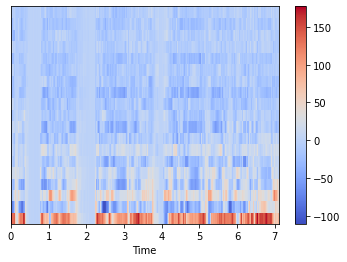

In [41]:
# try to retrieve the original example 
librosa.display.specshow(numpy_datas[200][0], sr=fs, x_axis='time')
plt.colorbar()

Separate the data list according to the label. Change file name to correct label. [1,0,0] is angry, [0,1,0] is happy, [0,0,1] is normal.

In [42]:
# change file name to correct label
angry = []
happy = []
normal = []

for i in range(len(numpy_datas)):
    file_name = numpy_datas[i][1]
    if "angry" in file_name:
        numpy_datas[i][1] = np.array([1,0,0])
        angry.append(numpy_datas[i])
    elif "happy" in file_name:
        numpy_datas[i][1] = np.array([0,1,0])
        happy.append(numpy_datas[i])
    else:
        numpy_datas[i][1] = np.array([0,0,1])
        normal.append(numpy_datas[i])

In [44]:
# check list with a certain emotion label
len(angry)

300

In [45]:
# check the shape of label
angry[0][1].shape

(3,)

Now split the Train-Valid-Test data with a ratio of 60%-20%-20%

In [46]:
# first shuffle the list of each emotion
random.shuffle(angry)
random.shuffle(happy)
random.shuffle(normal)

In [62]:
# then select the first 180 in each emotion as train data, first 60 in each emotion as valid data, and first 60 in each emotion as test data
train_data = angry[:int(len(angry)*0.6)] + happy[:int(len(happy)*0.6)] + normal[:int(len(normal)*0.6)]
valid_data = angry[int(len(angry)*0.6):int(len(angry)*(0.6+0.2))] + happy[int(len(happy)*0.6):int(len(happy)*(0.6+0.2))] + normal[int(len(normal)*0.6):int(len(normal)*(0.6+0.2))]
test_data = angry[int(len(angry)*(0.6+0.2)):] + happy[int(len(happy)*(0.6+0.2)):] + normal[int(len(normal)*(0.6+0.2)):]
random.shuffle(train_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [63]:
train_data

[[array([[ 89.542145  ,  93.61162   ,  90.634445  , ..., 108.569405  ,
           93.41292   ,  86.30768   ],
         [ -0.6668969 ,  -4.3782926 ,  -3.8762672 , ..., -30.882309  ,
           -0.20025623,  36.197174  ],
         [ 67.49408   ,  70.02295   ,  62.798225  , ...,   0.7550886 ,
           -3.951336  ,   7.1721034 ],
         ...,
         [  3.8329117 ,   7.471448  ,  15.674114  , ..., -22.826801  ,
          -18.151136  ,  -8.871632  ],
         [ -6.916471  ,  -4.455486  ,  -4.3169737 , ..., -22.597044  ,
          -21.900139  , -14.031681  ],
         [-17.138416  , -17.758984  , -17.035072  , ..., -10.477293  ,
          -11.432758  , -10.501631  ]], dtype=float32),
  array([1, 0, 0])],
 [array([[-4.9461369e+01, -5.0126720e+01, -3.3322853e+01, ...,
           6.3109043e+01,  9.3629379e+01,  1.2682585e+02],
         [-2.3420292e+01, -5.8047691e+01, -7.5273521e+01, ...,
          -1.2815361e+02, -9.0286591e+01, -5.1964672e+01],
         [ 5.3420326e+01,  4.9785278e+01,  5